# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# 2. Import and Read Data

In [2]:
anz = pd.read_excel("C:/Users/phong/Desktop/ANZ Data@ANZ/ANZ synthesised transaction dataset.xlsx")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


Having a look at the name of columns. 

In [5]:
pd.DataFrame({"Columns":anz.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


Checking the number of rows and columns in the data set:

Rows: 12043

Columns: 23

In [6]:
print("Data shape:", anz.shape)

Data shape: (12043, 23)


# 3. Overview - Basic check 

## 3.1. Summary of Data (non-null count, data types)

In [7]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

There are difference about non-null values in columns. That means data sets have missing values.

We should check the number of rows in the dataset.

In [8]:
print("Number of rows in dataset:",len(anz) )

Number of rows in dataset: 12043


## 3.2. Checking missing values in columns

In [9]:
missing = anz.isnull().sum()
missing = missing[missing > 0] #to exclude columns which don"t have missing values
percentage_of_missing = round(missing/len(anz)*100,2)
missing_table = pd.DataFrame({"Number of missing values" : missing, "Percentage" : percentage_of_missing}).sort_values(by= "Percentage", ascending = False )
missing_table

,Number of missing values,Percentage
merchant_code,11160,92.67
bpay_biller_code,11158,92.65
card_present_flag,4326,35.92
merchant_id,4326,35.92
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92


"merchant_code" and "bpay_biller_code" columns have a remarkable proportion of missing values (92.67%). We will works with these missing values later

## 3.3. Descriptive Statistics of columns with numeric data

In [10]:
anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


- There is no negative value in "balance" and "amount" columns.
- "balance" and "amount" columns have high standard deviation, their values are spread out over a huge range.
- In "age" columns, values seems to be reasonable. Nothing abnormal here. The youngest age is 18 and the oldest age is 78.

## 3.4. Customers, Transactions, Time

### The data set describes transactions of customers in ANZ. Therefore, before exploring columns more deeply, I check some basic information such as: 
- How many customers ?
- How many transactions ?
- The time period of data set: by checking the first and last day of "date" columns.  

In [11]:
print("Number of unique customer's ID:", anz.customer_id.nunique())
#Count number of distinct elements in specified axis.

Number of unique customer's ID: 100


In [12]:
print("Number of rows in dataset:",len(anz) )
print("Number of unique transaction's ID:",anz.transaction_id.nunique())

Number of rows in dataset: 12043
Number of unique transaction's ID: 12043


In [13]:
anz.date.describe()

count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

### After checking, we get some information:
- 100 Customers
- 12043 Transactions
- The time period in data set start from 01/08/2018 to 31/10/2018 (3 months or 92 days) 

However, there are only 91 days in the table. That means we have 1 missing day.

In [14]:
pd.date_range(start="2018-08-01", end = "2018-10-31").difference(anz.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

Missing date value:  2018-08-16

# 4. Exploratory Data Analysis

## 4.1. Categories variables

### 4.1.1. Status

In [15]:
anz.status.value_counts(dropna = False)

authorized    7717
posted        4326
Name: status, dtype: int64

- Authorized: transactions which have been approved and are pending in account.
- Posted: everything is completed and there is nothing further.

### 4.1.2. Card Present flag

In [16]:
anz.card_present_flag.value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

Card Present and Card-not-present (CNP) transactions.
- A card-not-present (CNP) transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction.
- Conversely, a Card Present transaction occurs when cards are physically tapped to a contactless reader.


### 4.1.3. Bpay Biller Code

In [17]:
anz.bpay_biller_code.value_counts(dropna = False)

NaN                                      11158
0                                          883
 THE DISCOUNT CHEMIST GROUP                  1
 LAND WATER & PLANNING East Melbourne        1
Name: bpay_biller_code, dtype: int64

### 4.1.4. Account

- The unique code of each customer

In [18]:
anz.account.head()

0    ACC-1598451071
1    ACC-1598451071
2    ACC-1222300524
3    ACC-1037050564
4    ACC-1598451071
Name: account, dtype: object

In [19]:
print("Number of accounts:", anz.account.nunique())

Number of accounts: 100


The number of accounts is 100 that equals the number of customer_id. It is likely that there is no errors with "account" columns

### 4.1.5. Currency of transaction

In [20]:
anz.currency.value_counts(dropna=False)

AUD    12043
Name: currency, dtype: int64

### 4.1.6. Longtitude and Latitude 

- To navigate the location where transaction is conducted

In [21]:
anz.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

In [22]:
print("Number of long_lat:", anz.long_lat.nunique())

Number of long_lat: 100


### 4.1.7. Types of Trasaction

In [23]:
anz.txn_description.value_counts(dropna=False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [24]:
sum(anz.txn_description.value_counts(dropna=False))

12043

### Note: POS means "Point of Sale’ in banking terms. That means customer"s card was used to make a purchase. 

Text(0.5, 1.0, 'Number of transactions by category')

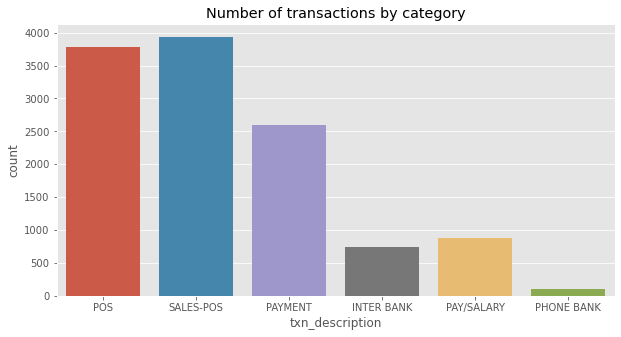

In [25]:
plt.figure(figsize= (10, 5))
sns.countplot(anz.txn_description)
plt.title("Number of transactions by category")

In [26]:
anz[["txn_description", "amount"]].groupby("txn_description", as_index = False).mean().sort_values(by = "amount", ascending = False )

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction amount by category')

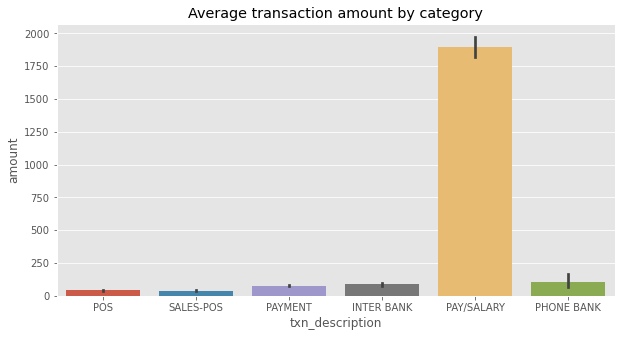

In [27]:
plt.figure(figsize = (10,5))
sns.barplot(x = "txn_description", y = "amount", data = anz)
plt.title("Average transaction amount by category")

Pay/Salary has the largest transaction amount

### 4.1.8. Gender

In [28]:
anz.gender.value_counts(dropna=False)

M    6285
F    5758
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of transaction by gender')

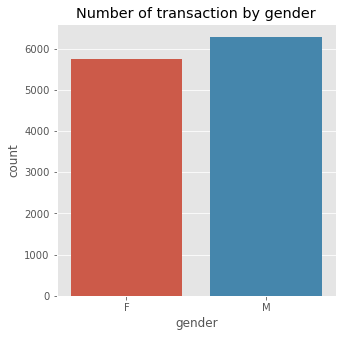

In [29]:
plt.figure(figsize = (5,5))
sns.countplot(anz.gender)
plt.title("Number of transaction by gender")

In [30]:
anz[["gender", "amount"]].groupby("gender", as_index = False).mean().sort_values(by = "amount",ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction amount by gender')

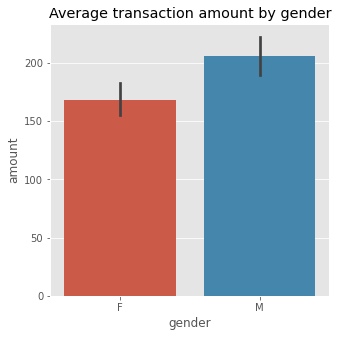

In [31]:
plt.figure(figsize = (5,5))
sns.barplot(x = "gender", y ="amount", data = anz)
plt.title("Average transaction amount by gender")

### 4.1.9. Merchant surbub

In [32]:
anz.merchant_suburb.value_counts(dropna = False)

NaN               4326
Melbourne          255
Sydney             233
Southport           82
Brisbane City       79
                  ... 
Jamisontown          1
Sydenham             1
Toorak Gardens       1
Barton               1
Tarro                1
Name: merchant_suburb, Length: 1610, dtype: int64

### 4.1.10. Merchant state

In [33]:
anz.merchant_state.value_counts(dropna=False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Text(0.5, 1.0, 'Number of transaction by state')

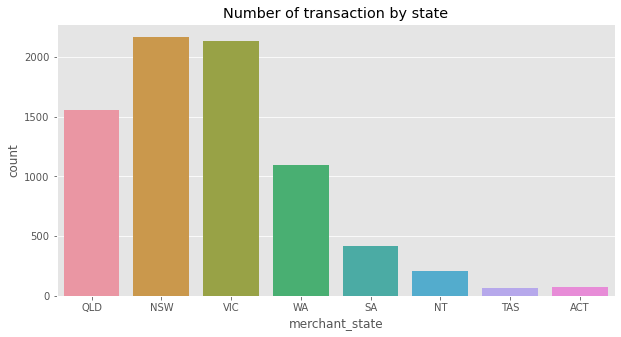

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(anz.merchant_state)
plt.title("Number of transaction by state")

### 4.1.11. Extraction

In [35]:
anz.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

This appears to be the timestamp for each transaction. We can cross reference this with the date column.

In [36]:
anz[["date", "extraction"]].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


### 4.1.12. Country

In [37]:
anz.country.value_counts(dropna=False)

Australia    12043
Name: country, dtype: int64

All of transactions is in Australia

### 4.1.13. Merchant longitude and latitude

In [38]:
anz[["long_lat","merchant_long_lat"]].head()

,long_lat,merchant_long_lat
0,153.41 -27.95,153.38 -27.99
1,153.41 -27.95,151.21 -33.87
2,151.23 -33.94,151.21 -33.87
3,153.10 -27.66,153.05 -26.68
4,153.41 -27.95,153.44 -28.06


### 4.1.14. Movement (Debit/Credit)

In [39]:
anz.movement.value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

Text(0.5, 1.0, 'Number of transaction by movement')

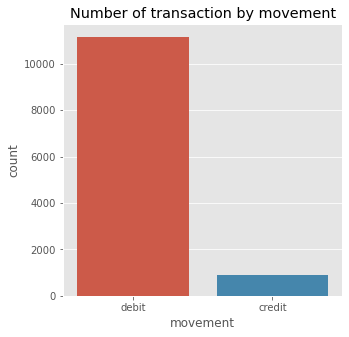

In [40]:
plt.figure(figsize = (5,5))
sns.countplot(anz.movement)
plt.title("Number of transaction by movement")

Text(0.5, 1.0, 'Average transaction amount by movement')

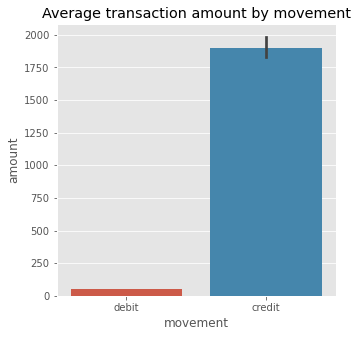

In [41]:
plt.figure(figsize =(5,5))
sns.barplot(y= "amount",x= "movement",data = anz)
plt.title("Average transaction amount by movement")

## 4.2 Numerical variable

### 4.2.1 Balance

In [42]:
anz.balance.head()

0      35.39
1      21.20
2       5.71
3    2117.22
4      17.95
Name: balance, dtype: float64

Check if this column has any negative number.

In [43]:
anz.loc[anz.balance < 0]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


In [44]:
anz.balance.describe()

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
max      267128.520000
Name: balance, dtype: float64

Text(0.5, 1.0, 'Balance distribution')

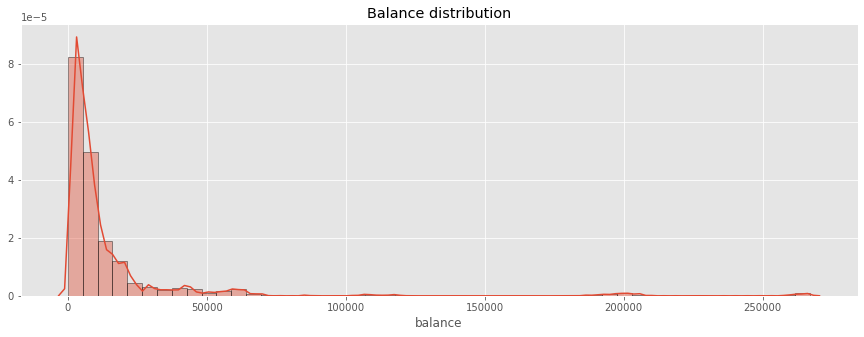

In [45]:
plt.figure(figsize = (15,5))
sns.distplot(anz.balance,hist_kws=dict(edgecolor="black", linewidth=1))
plt.title("Balance distribution")

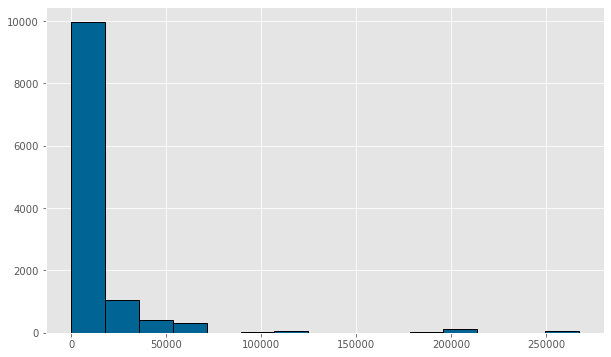

In [46]:
plt.figure(figsize = (10,6))
plt.hist(anz.balance,bins = 15,edgecolor="black", linewidth=1, color = "#006494")
plt.show()

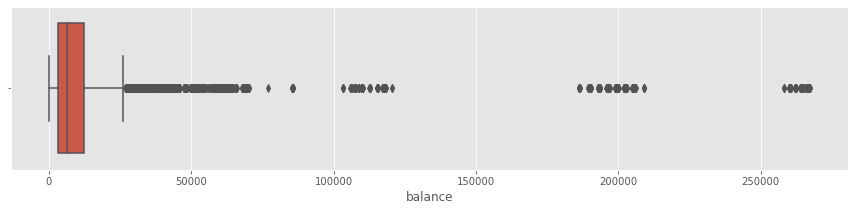

In [47]:
plt.figure(figsize = (15,3))
sns.boxplot(anz.balance)

### 4.2.2. Age of customers

In [48]:
anz.age.describe()

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age distribution')

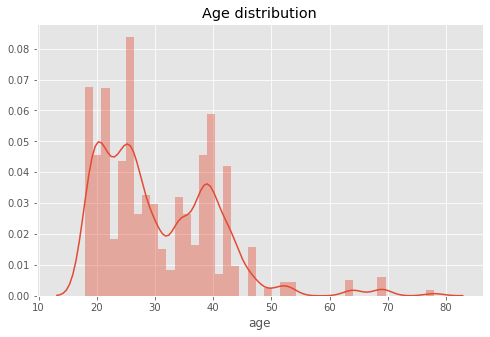

In [49]:
plt.figure(figsize = (8, 5))
sns.distplot(anz.age, kde= True)
plt.title("Age distribution")

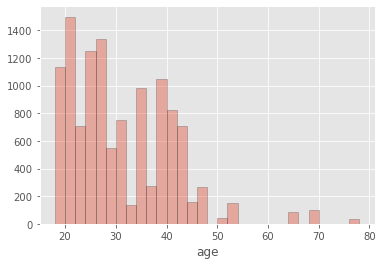

In [50]:
sns.distplot(anz.age, bins =30, hist = True, kde= False, hist_kws={"edgecolor":"black"})

### 4.2.3. Transaction amount

In [51]:
anz.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

Text(0.5, 1.0, 'Amount distribution')

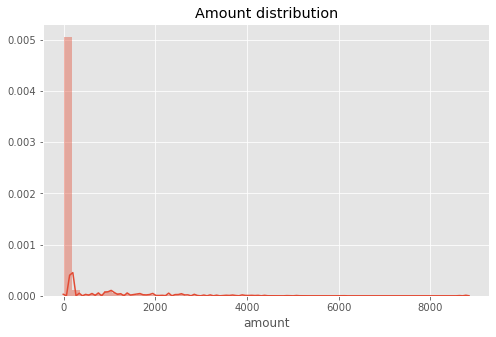

In [52]:
plt.figure( figsize = (8,5))
sns.distplot(anz.amount)
plt.title("Amount distribution")

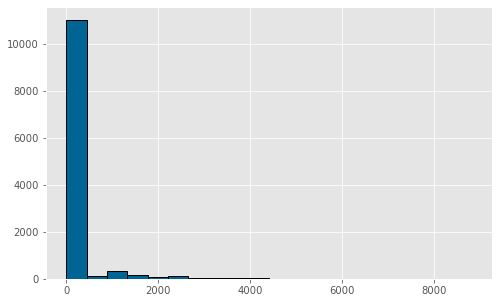

In [53]:
plt.figure(figsize = (8,5))
plt.hist(anz.amount,bins = 20,edgecolor="black", linewidth=1, color ="#006494")
plt.show()

# 5. Data Wrangling

Focusing on dropping unwanted columns, deal with missing values and finally create some additional features that will make our data analysis more detailed and meaningful.

## 5.1. Drop unwanted values

Every transactions have AUD currency and have been conducted in Australia. Hence, we may drop "currency" and "country" columns.

In [54]:
anz = anz.drop(["currency", "country"], axis = 1)

## 5.2. Deal with missing values

In [55]:
missing_table

,Number of missing values,Percentage
merchant_code,11160,92.67
bpay_biller_code,11158,92.65
card_present_flag,4326,35.92
merchant_id,4326,35.92
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92


### From observation, these columns are seem to have the connection with Sale Transactions (the word "merchant").
We have 6 types of transactions: 
- PAY/SALARY
- PHONE BANK
- INTER BANK
- PAYMENT
- POS
- SALES-POS

Whether missing values is from 4 transactions that is not sale ? Including:
- PAY/SALARY
- PHONE BANK
- INTER BANK
- PAYMENT

In [56]:
non_sales = anz.loc[(anz.txn_description !="POS") | (anz.txn_description != "SALES-POS"), :]
non_sales.isnull().sum().sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
card_present_flag     4326
merchant_state        4326
merchant_suburb       4326
merchant_id           4326
merchant_long_lat     4326
movement                 0
first_name               0
account                  0
long_lat                 0
txn_description          0
date                     0
balance                  0
gender                   0
age                      0
extraction               0
amount                   0
transaction_id           0
customer_id              0
status                   0
dtype: int64

card_present_flag    
merchant_state        
merchant_suburb       
merchant_id           
merchant_long_lat     

5 columns have the exact number (4326) of missing value with data description above => All of missing value come from transactions that are non-sales


We will proceed to fill these missing values with n/a

In [57]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    anz[col].fillna("n/a",  inplace = True)

In [58]:
# Test
anz.loc[anz.txn_description == "PAYMENT"].head(2)

,status,card_present_flag,bpay_biller_code,account,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
5,posted,n/a,NaN,ACC-1608363396,151.22 -33.87,PAYMENT,n/a,NaN,Robert,1705.43,2018-08-01,M,20,n/a,n/a,2018-08-01T02:00:00.000+0000,163.0,1005b48a6eda4ffd85e9b649dc9467d3,CUS-2688605418,n/a,debit
10,posted,n/a,NaN,ACC-2171593283,146.94 -36.04,PAYMENT,n/a,NaN,Fernando,4348.50,2018-08-01,M,19,n/a,n/a,2018-08-01T06:00:00.000+0000,27.0,baff17b27b2643c48c84fca7129e9611,CUS-2317998716,n/a,debit


In [59]:
anz.merchant_state.describe()

count     12043
unique        9
top         n/a
freq       4326
Name: merchant_state, dtype: object

In [60]:
anz.merchant_state.value_counts()

n/a    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [61]:
missing = anz.isnull().sum()

missing.sort_values(ascending= False)

merchant_code        11160
bpay_biller_code     11158
movement                 0
balance                  0
card_present_flag        0
account                  0
long_lat                 0
txn_description          0
merchant_id              0
first_name               0
date                     0
merchant_long_lat        0
gender                   0
age                      0
merchant_suburb          0
merchant_state           0
extraction               0
amount                   0
transaction_id           0
customer_id              0
status                   0
dtype: int64

Both merchant_code and bray_biller_code are severely  missing 92.7%. Therefore, we should drop these 2 columns from the dataframe.

In [62]:
anz = anz.drop(["merchant_code", "bpay_biller_code"], axis = 1)

In [63]:
anz.isnull().sum().max()

0

## 5.3 Create features for month, day of week and hour

Looking the pattern of the total daily amount of transactions with line chart.  

In [64]:
daily_amount = pd.DataFrame(anz.groupby("date").amount.sum())
daily_amount.head(5)

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Total daily transactions amount')

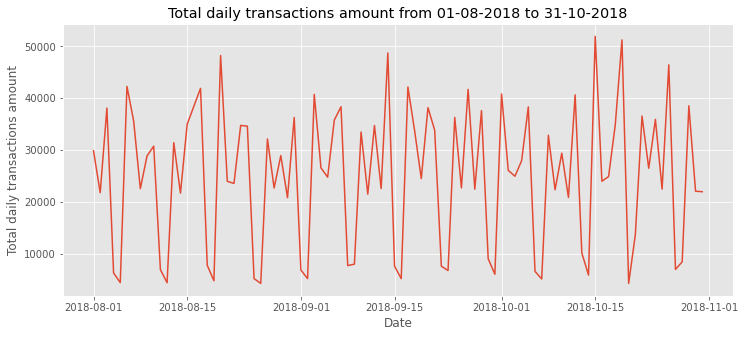

In [65]:

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(daily_amount.index,daily_amount.amount)
plt.title("Total daily transactions amount from 01-08-2018 to 31-10-2018")
plt.xlabel("Date")
plt.ylabel("Total daily transactions amount")

A cyclical pattern is seen in the transaction amount during the 3-month period of dataset. There are days when the transaction amount is much less than others and they repeat after the same periods. 

My hypothesis is:
- Whether the amount of transactions in some days of the week are lower than others
- Salaries are paid in some certain days of the weeks

I also would like to compare the number of transactions by hours and the average amount of transactions between months.

As a result, I create extra columns
- hour 
- day_of_week
- month

Create Day of Week Name

First, I convert the date to the day of week with:
- Monday = 0
- Tuesday = 1
- Wednesday = 2
- Thursday = 3
- Friday = 4
- Saturday =5
- Sunday = 6

In [66]:
anz["day_number"]=anz["date"].dt.weekday
anz.day_number.head()

0    2
1    2
2    2
3    2
4    2
Name: day_number, dtype: int64

And then, I convert the day of week in number to their name.

In [67]:
dw_mapping={
    0: "Monday", 
    1: "Tuesday", 
    2: "Wednesday", 
    3: "Thursday", 
    4: "Friday",
    5: "Saturday", 
    6: "Sunday"
} 
anz["day_of_week"]=anz["date"].dt.weekday.map(dw_mapping)
anz.head(2)

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,day_number,day_of_week
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,2,Wednesday
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,2,Wednesday


In [68]:
# Test the accuracy of day_of_week_name
anz[["date","day_of_week"]].loc[anz.date == "2018-08-05"]


,date,day_of_week
564,2018-08-05,Sunday
565,2018-08-05,Sunday
566,2018-08-05,Sunday
567,2018-08-05,Sunday
568,2018-08-05,Sunday
...,...,...
659,2018-08-05,Sunday
660,2018-08-05,Sunday
661,2018-08-05,Sunday
662,2018-08-05,Sunday


In [69]:
anz["month"] = pd.DatetimeIndex(anz.date).month
anz[["date", "month", "day_of_week"]].head()

,date,month,day_of_week
0,2018-08-01,8,Wednesday
1,2018-08-01,8,Wednesday
2,2018-08-01,8,Wednesday
3,2018-08-01,8,Wednesday
4,2018-08-01,8,Wednesday


We can also get the hour of transactions.

First, I extract the time from "extraction" column. Then, I will create "hour" column that contains only the hour component of each transaction.

In [70]:
anz.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [71]:
anz["extraction_hour"] = [timestamp.split("T")[1].split(".")[0] for timestamp in anz.extraction]
anz.extraction_hour.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction_hour, dtype: object

In [72]:
anz["hour"] = pd.DatetimeIndex(anz.extraction_hour).hour
anz[["extraction_hour", "hour"]].head()

,extraction_hour,hour
0,01:01:15,1
1,01:13:45,1
2,01:26:15,1
3,01:38:45,1
4,01:51:15,1


In [73]:
#Another way to extract the hour component.
anz["hour_1"] = [hour1.split(":")[0] for hour1 in anz.extraction_hour]
anz[["extraction_hour","hour_1"]].head()

,extraction_hour,hour_1
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [74]:
anz.drop(columns= "hour_1", inplace = True)
anz.head(2)

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,day_number,day_of_week,month,extraction_hour,hour
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,2,Wednesday,8,01:01:15,1
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,2,Wednesday,8,01:13:45,1


In [75]:
#Convert data type of data to integer for analysis
anz["hour"] = pd.to_numeric(anz.hour)
anz.hour.dtype

dtype('int64')

# 6. Deeper Analysis

After cleaning, our dataset is in a better shape and we have some new features to work with. 
Now I do a deeper analysis to get some interesting insights from ANZ customer"s transactions. 

In [76]:
anz.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,day_number,day_of_week,month,extraction_hour,hour
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,2,Wednesday,8,01:01:15,1
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,2,Wednesday,8,01:13:45,1
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,2,Wednesday,8,01:26:15,1
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,2,Wednesday,8,01:38:45,1
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,2,Wednesday,8,01:51:15,1


## 6.1. Transaction Amount

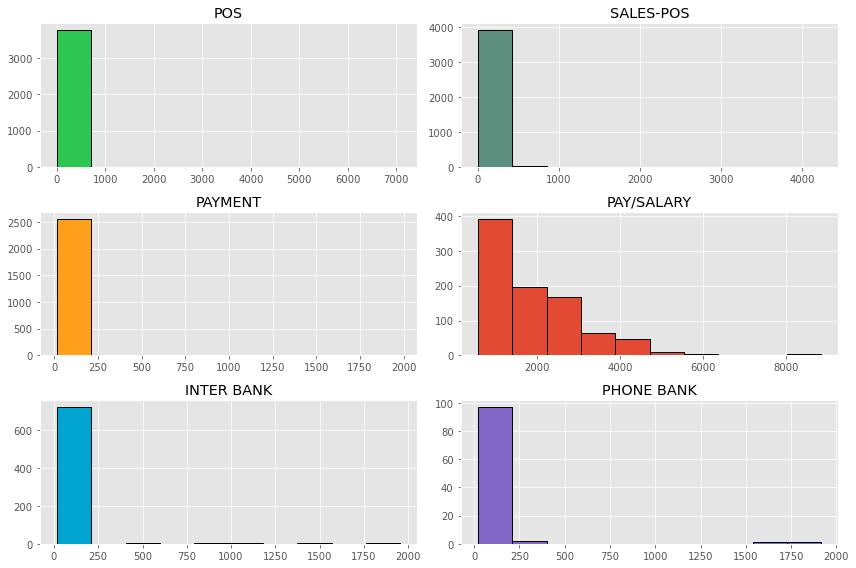

In [77]:
pos_amount = anz.loc[anz.txn_description == "POS", "amount"]
salespos_amount = anz.loc[anz.txn_description == "SALES-POS","amount"]
payment_amount = anz.loc[anz.txn_description == "PAYMENT","amount"]
salary_amount = anz.loc[anz.txn_description == "PAY/SALARY","amount"]
inter_amount = anz.loc[anz.txn_description == "INTER BANK","amount"]
phone_amount = anz.loc[anz.txn_description == "PHONE BANK","amount"]


plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(3,2)

pos_amount.hist( edgecolor="black",linewidth=1, ax=axes[0,0], color= "#2dc653")
axes[0,0].set_title("POS")

salespos_amount.hist( edgecolor="black",linewidth=1, ax=axes[0,1], color= "#5b8e7d")
axes[0,1].set_title("SALES-POS")

payment_amount.hist( edgecolor="black",linewidth=1, ax=axes[1,0], color= "#ff9f1c")
axes[1,0].set_title("PAYMENT")

salary_amount.hist( edgecolor="black",linewidth=1, ax=axes[1,1])
axes[1,1].set_title("PAY/SALARY")

inter_amount.hist( edgecolor="black",linewidth=1, ax=axes[2,0], color= "#00a5cf")
axes[2,0].set_title("INTER BANK")

phone_amount.hist( edgecolor="black",linewidth=1, ax=axes[2,1], color= "#8367c7")
axes[2,1].set_title("PHONE BANK")

plt.show()

In [78]:
pos_amount.describe()


count    3783.000000
mean       40.407412
std       165.771678
min         0.100000
25%        12.035000
50%        19.430000
75%        33.155000
max      7081.090000
Name: amount, dtype: float64

In [79]:
salespos_amount.describe()

count    3934.000000
mean       39.909789
std       132.734185
min         0.100000
25%        12.160000
50%        20.035000
75%        34.575000
max      4233.000000
Name: amount, dtype: float64

In [80]:
payment_amount.describe()

count    2600.000000
mean       77.613077
std       152.310315
min        15.000000
25%        32.000000
50%        42.500000
75%        70.000000
max      1981.000000
Name: amount, dtype: float64

In [81]:
salary_amount.describe()

count     883.000000
mean     1898.728029
std      1150.364621
min       576.000000
25%      1013.670000
50%      1626.480000
75%      2538.680000
max      8835.980000
Name: amount, dtype: float64

In [82]:
inter_amount.describe()

count     742.000000
mean       86.699461
std       198.706044
min        16.000000
25%        26.000000
50%        39.000000
75%        83.000000
max      1956.000000
Name: amount, dtype: float64

In [83]:
phone_amount.describe()

count     101.000000
mean      106.099010
std       245.999695
min        21.000000
25%        36.000000
50%        43.000000
75%        67.000000
max      1916.000000
Name: amount, dtype: float64

In [84]:
anz.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

From observation, Variance of "SALARY" is much higher than others. It results in the high variance of overall transaction amount.  

## 6.2.Segment the dataset by transaction date and time

### 6.2.1. Average transaction amount by weekday

In [85]:
average_daily_amount = pd.DataFrame(anz.groupby("day_number").amount.mean())
average_daily_amount["day_name"] = average_daily_amount.index.map(dw_mapping)
average_daily_amount.amount = round(average_daily_amount.amount, 2)
average_daily_amount.head(10)

,amount,day_name
day_number,,
0,373.22,Monday
1,221.58,Tuesday
2,195.22,Wednesday
3,184.01,Thursday
4,249.35,Friday
5,54.42,Saturday
6,53.02,Sunday


Text(0.5, 0, 'Day of week')

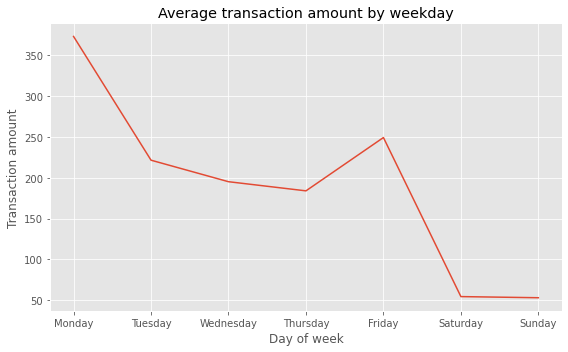

In [86]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_daily_amount.day_name, average_daily_amount.amount)
plt.title("Average transaction amount by weekday")
plt.ylabel("Transaction amount")
plt.xlabel("Day of week")

### 6.2.2. Number of Transactions by weekday

In [87]:
number_transaction_weekday = pd.DataFrame(anz.groupby("day_number").amount.count())
number_transaction_weekday["day_name"] = number_transaction_weekday.index.map(dw_mapping)
number_transaction_weekday.head(10)

,amount,day_name
day_number,,
0,1360,Monday
1,1487,Tuesday
2,2063,Wednesday
3,1801,Thursday
4,2073,Friday
5,1709,Saturday
6,1550,Sunday


Text(0.5, 0, 'Day of week')

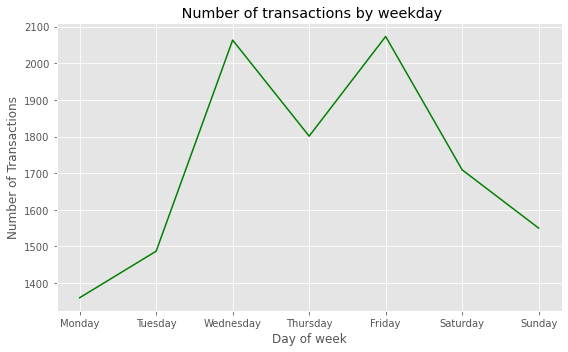

In [88]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(number_transaction_weekday.day_name, number_transaction_weekday.amount, color = "green")
plt.title(" Number of transactions by weekday")
plt.ylabel("Number of Transactions")
plt.xlabel("Day of week")

This line chart shows that Monday has the lowest number of transactions over the 3-month observed period. Conversely, according to the graph of Average transaction amount by weekday, the average amount of transactions in Monday is highest. My hypothesis is there are some transactions that have much higher value than others on Mondays.   

In [89]:
test_1 = anz.loc[(anz.day_of_week == "Monday"), :]
test_1.amount.describe()

count    1360.000000
mean      373.221000
std       906.663333
min         2.100000
25%        17.635000
50%        35.000000
75%        94.520000
max      8835.980000
Name: amount, dtype: float64

In [90]:
anz.amount.mean()

187.93358797641767

In [91]:
anz.amount.median()

29.0

It is correct. The highest value of transactions on Mondays is $8835.98 that much higher than median value of transactions in the dataset. It is also the highest amount in our dataset. 

### 6.2.3 Number of Transactions each day by category 

I group types of Transactions into 3 main categories:
- Salary
- Purchase
- Other 

In [92]:
anz.loc[anz.txn_description == "PAY/SALARY", "category"] = "SALARY"
anz.loc[(anz.txn_description == "POS") | (anz.txn_description == "SALES-POS"), "category"] = "PURCHASE"
anz.category.fillna("OTHERS", inplace = True )
anz[["txn_description", "category"]].head()

,txn_description,category
0,POS,PURCHASE
1,SALES-POS,PURCHASE
2,POS,PURCHASE
3,SALES-POS,PURCHASE
4,SALES-POS,PURCHASE


In [93]:
test_1 = anz.loc[(anz.day_number == 6),:]
test_1.category.value_counts()

PURCHASE    1126
OTHERS       424
Name: category, dtype: int64

In [94]:
transaction_category = pd.DataFrame(anz.groupby(["day_number","category"]).amount.count())
transaction_category

amount
day_number category        
0          OTHERS       411
           PURCHASE     742
           SALARY       207
1          OTHERS       486
           PURCHASE     841
           SALARY       160
2          OTHERS       640
           PURCHASE    1251
           SALARY       172
3          OTHERS       555
           PURCHASE    1103
           SALARY       143
4          OTHERS       555
           PURCHASE    1317
           SALARY       201
5          OTHERS       372
           PURCHASE    1337
6          OTHERS       424
           PURCHASE    1126

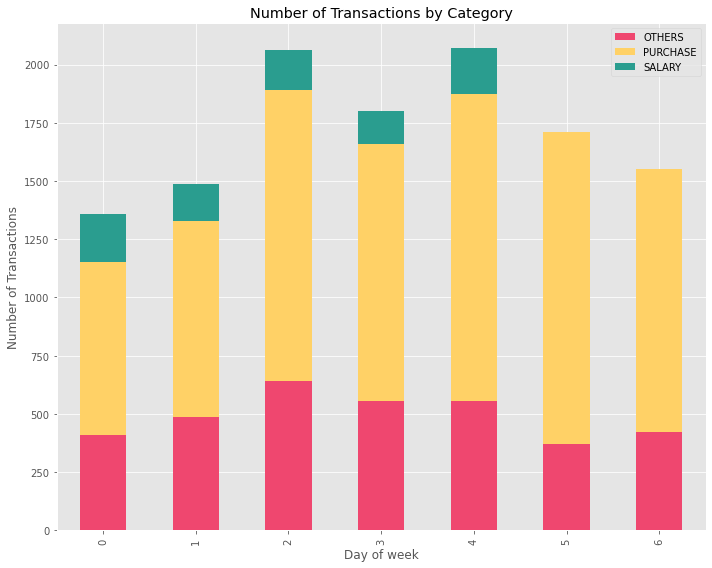

In [95]:
transaction_category.unstack().plot(kind = "bar", stacked = True
                                    ,figsize = (10,8)
                                    ,color = ["#ef476f", "#ffd166", "#2a9d8f"])
plt.title("Number of Transactions by Category")
plt.legend(["OTHERS", "PURCHASE","SALARY"])
plt.ylabel("Number of Transactions")
plt.xlabel("Day of week")
plt.show()

It can be seen clearly that there is no "SALARY" transactions at the weekend. In addition, the proportion of "PURCHASE" transaction is highest in every day of the week. 

### 6.2.4. Average number of transaction per hour

In [96]:
average_hourly_number = pd.DataFrame(anz.groupby("hour").amount.count())

average_hourly_number.rename(columns= {"amount" : "number"}, inplace= True)
average_hourly_number


,number
hour,
0,108
1,214
2,212
3,196
4,309
5,209
6,249
7,266
8,547


Text(0, 0.5, 'Number of Transactions')

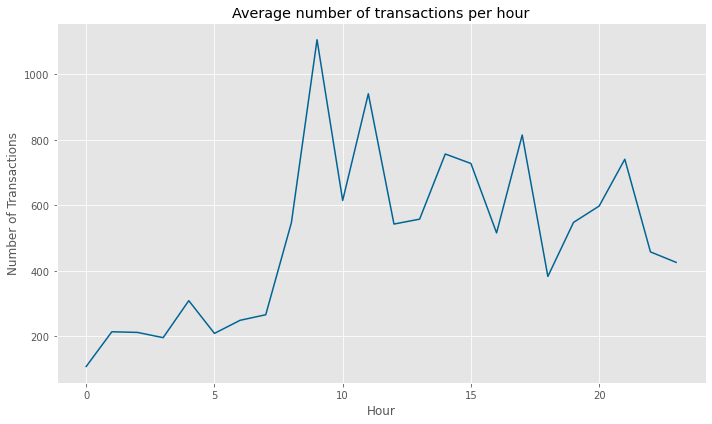

In [97]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(average_hourly_number.index, average_hourly_number["number"], color = "#006494")
plt.title("Average number of transactions per hour")
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")

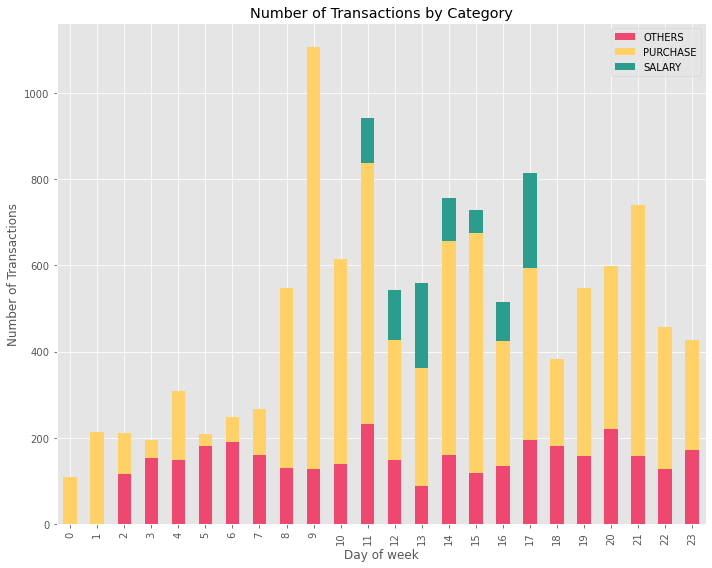

In [98]:
hourly_category = pd.DataFrame(anz.groupby(["hour","category"]).amount.count())
hourly_category.unstack().plot(kind = "bar", stacked = True
                                    ,figsize = (10,8)
                                    ,color = ["#ef476f", "#ffd166", "#2a9d8f"])
plt.title("Number of Transactions by Category")
plt.legend(["OTHERS", "PURCHASE","SALARY"])
plt.ylabel("Number of Transactions")
plt.xlabel("Day of week")
plt.show()

- If the standard is 600 transactions,  9-11 am, 2-5 pm (except 4pm) and 8-9 pm are periods having high-volume transactions.
- Customers conduct the most transactions at 9am.
- "SALARY" transactions are often conducted from 11am to 5pm.
- From midnight to 1am there is only "Purchase" transactions.


### 6.2.5. Test Pivot Table 

In [99]:

stacked_barplot = pd.DataFrame(anz.groupby(["day_number","day_of_week","txn_description"]).amount.count())

stacked_barplot

amount
day_number day_of_week txn_description        
0          Monday      INTER BANK           99
                       PAY/SALARY          207
                       PAYMENT             311
                       PHONE BANK            1
                       POS                 354
                       SALES-POS           388
1          Tuesday     INTER BANK          123
                       PAY/SALARY          160
                       PAYMENT             345
                       PHONE BANK           18
                       POS                 414
                       SALES-POS           427
2          Wednesday   INTER BANK          169
                       PAY/SALARY          172
                       PAYMENT             441
                       PHONE BANK           30
                       POS                 602
                       SALES-POS           649
3          Thursday    INTER BANK           87
                       PAY/SALARY          143
                       PAYMENT             442
                       PHONE BANK           26
                       POS                 573
                       SALES-POS           530
4          Friday      INTER BANK           80
                       PAY/SALARY          201
                       PAYMENT             470
                       PHONE BANK            5
                       POS                 655
                       SALES-POS           662
5          Saturday    INTER BANK           62
                       PAYMENT             294
                       PHONE BANK           16
                       POS                 652
                       SALES-POS           685
6          Sunday      INTER BANK          122
                       PAYMENT             297
                       PHONE BANK            5
                       POS                 533
                       SALES-POS           593

In [100]:
# Another command to get pivot table

table = anz.pivot_table(anz, index=["day_number","day_of_week","txn_description"], aggfunc= {"amount":np.count_nonzero}) 
table

amount
day_number day_of_week txn_description        
0          Monday      INTER BANK         99.0
                       PAY/SALARY        207.0
                       PAYMENT           311.0
                       PHONE BANK          1.0
                       POS               354.0
                       SALES-POS         388.0
1          Tuesday     INTER BANK        123.0
                       PAY/SALARY        160.0
                       PAYMENT           345.0
                       PHONE BANK         18.0
                       POS               414.0
                       SALES-POS         427.0
2          Wednesday   INTER BANK        169.0
                       PAY/SALARY        172.0
                       PAYMENT           441.0
                       PHONE BANK         30.0
                       POS               602.0
                       SALES-POS         649.0
3          Thursday    INTER BANK         87.0
                       PAY/SALARY        143.0
                       PAYMENT           442.0
                       PHONE BANK         26.0
                       POS               573.0
                       SALES-POS         530.0
4          Friday      INTER BANK         80.0
                       PAY/SALARY        201.0
                       PAYMENT           470.0
                       PHONE BANK          5.0
                       POS               655.0
                       SALES-POS         662.0
5          Saturday    INTER BANK         62.0
                       PAYMENT           294.0
                       PHONE BANK         16.0
                       POS               652.0
                       SALES-POS         685.0
6          Sunday      INTER BANK        122.0
                       PAYMENT           297.0
                       PHONE BANK          5.0
                       POS               533.0
                       SALES-POS         593.0